## 📌 Introduction

House rent prices in metro cities like Mumbai vary significantly depending on multiple factors such as locality, house type, built-up area, furnishing level, and amenities.  
This project focuses on building a **Machine Learning-based House Rent Prediction System** that can estimate the **monthly rent (₹)** using property-related features.

In this notebook, I performed an end-to-end workflow starting from **dataset loading** to **data preprocessing**, **exploratory data analysis (EDA)**, **outlier handling**, and finally **model building & evaluation**.

### 🎯 Objective
The main objective of this project is:
- To analyze the key factors affecting house rent prices in Mumbai
- To clean and preprocess the dataset for better model performance
- To build multiple regression models and compare their performance
- To select the best-performing model for rent prediction

### 🛠 Steps Performed in this Notebook
1. **Dataset Loading & Basic Inspection**
   - Checked dataset shape, column names, datatypes, and missing values

2. **Data Cleaning & Preprocessing**
   - Removed duplicates (if any)
   - Handled missing values
   - Converted categorical features into numeric format using encoding
   - Ensured all features were model-ready

3. **Outlier Detection & Handling**
   - Identified extreme values affecting rent predictions
   - Applied outlier handling techniques to reduce noise and improve accuracy

4. **Model Building**
   I trained and tested multiple regression models:
   - **Linear Regression**
   - **Decision Tree Regressor**
   - **Random Forest Regressor**

5. **Model Evaluation**
   For each model, I evaluated performance using:
   - **R² Score**
   - **RMSE (Root Mean Squared Error)**

### 📌 Model Output Snapshots (Included in Notebook)
I have also included output screenshots showing the evaluation results of:
- Linear Regression (R² & RMSE)
- Decision Tree Regressor (R² & RMSE)
- Random Forest Regressor (R² & RMSE)

This comparison helps in selecting the best model for accurate rent prediction.


In [1]:
# Import Neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Mumbai_House_Rent.csv")
df

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,Missing,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,1,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,4,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,Missing,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,3,1.0,800 sq.ft
...,...,...,...,...,...,...,...,...,...
15381,Worli,1 RK Apartment,25000,300 sq.ft,Fully Furnished,1,Missing,0.0,Missing
15382,Worli,3 BHK Apartment,215000,3132 sq.ft,Semi Furnished,3,2,3.0,765 sq.ft
15383,Worli,2 BHK Apartment,100000,1180 sq.ft,Fully Furnished,2,3,1.0,920 sq.ft
15384,Worli,3 BHK Apartment,240000,3400 sq.ft,Semi Furnished,4,2,2.0,2100 sq.ft


In [3]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)     object
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

In [4]:
df.Bathrooms.unique()

array(['1', '3', '2', 'Missing', '4', '5', '6', '7'], dtype=object)

In [5]:
df.Bathrooms.replace('Missing',np.nan,inplace=True)

In [6]:
df.Balcony.unique()

array(['Missing', '1', '4', '3', '2', '5', '6'], dtype=object)

In [7]:
df.Balcony.replace('Missing',np.nan,inplace=True)

In [8]:
df['Build_up_area(sq.ft)'].str.split().str[0]

0         350
1        1850
2        1240
3         650
4        1250
         ... 
15381     300
15382    3132
15383    1180
15384    3400
15385    3200
Name: Build_up_area(sq.ft), Length: 15386, dtype: object

In [9]:
df['Build_up_area(sq.ft)']=df['Build_up_area(sq.ft)'].str.split().str[0]

In [10]:
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].astype('int')

In [11]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

In [12]:
df["Carpet_area(sq.ft)"].unique()

array(['250 sq.ft', '1400 sq.ft', '850 sq.ft', '425 sq.ft', '800 sq.ft',
       '889 sq.ft', '710 sq.ft', '1600 sq.ft', '1064 sq.ft', '430 sq.ft',
       '880 sq.ft', '650 sq.ft', '280 sq.ft', 'Missing', '824 sq.ft',
       '1280 sq.ft', '790 sq.ft', '1100 sq.ft', '480 sq.ft', '450 sq.ft',
       '415 sq.ft', '700 sq.ft', '1054 sq.ft', '600 sq.ft', '1270 sq.ft',
       '225 sq.ft', '960 sq.ft', '436 sq.ft', '760 sq.ft', '786 sq.ft',
       '750 sq.ft', '1200 sq.ft', '500 sq.ft', '1050 sq.ft', '540 sq.ft',
       '270 sq.ft', '410 sq.ft', '950 sq.ft', '1300 sq.ft', '1235 sq.ft',
       '685 sq.ft', '580 sq.ft', '300 sq.ft', '900 sq.ft', '997 sq.ft',
       '1042 sq.ft', '435 sq.ft', '989 sq.ft', '873 sq.ft', '475 sq.ft',
       '1000 sq.ft', '1381 sq.ft', '490 sq.ft', '550 sq.ft', '898 sq.ft',
       '390 sq.ft', '488 sq.ft', '785 sq.ft', '630 sq.ft', '400 sq.ft',
       '228 sq.ft', '360 sq.ft', '1250 sq.ft', '350 sq.ft', '784 sq.ft',
       '590 sq.ft', '875 sq.ft', '711 sq.ft', '1015

In [13]:
df['Carpet_area(sq.ft)'].replace('Missing',0,inplace=True)

In [14]:
df['Carpet_area(sq.ft)']=df['Carpet_area(sq.ft)'].str.split().str[0]

In [15]:
def to_num(s):
    if type(s)==str:
        return int(s)
    else:
        return s

In [16]:
df['Carpet_area(sq.ft)'] = df['Carpet_area(sq.ft)'].apply(to_num)

In [17]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)      float64
dtype: object

<Axes: >

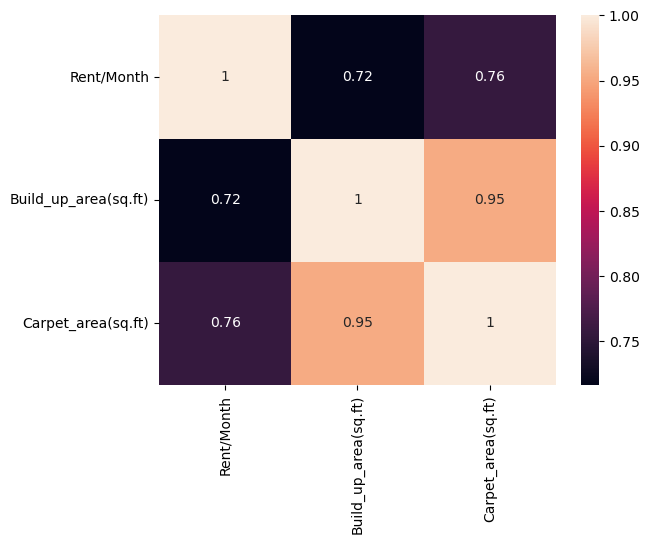

In [18]:
sns.heatmap(df[["Rent/Month","Build_up_area(sq.ft)","Carpet_area(sq.ft)"]].corr(),annot=True)

Build_up_area and Carpet area are strongly correlated with each other so dropping Carpet area column

In [19]:
df.drop('Carpet_area(sq.ft)',axis=1,inplace=True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rent/Month,15386.0,54306.799363,43373.356708,3500.0,30000.0,43000.0,65000.0,1000000.0
Build_up_area(sq.ft),15386.0,909.017873,439.382630,110.0,600.0,850.0,1150.0,5200.0
Parking,15351.0,0.971272,0.672316,0.0,1.0,1.0,1.0,4.0


In [21]:
df.isna().sum()/len(df)*100

Locality                 0.000000
Type                     0.000000
Rent/Month               0.000000
Build_up_area(sq.ft)     0.000000
Furnishing               0.000000
Bathrooms                2.625764
Balcony                 60.262576
Parking                  0.227480
dtype: float64

In [22]:
df.Parking.mode()[0]

np.float64(1.0)

In [23]:
df.Parking.fillna(0,inplace=True)

In [24]:
df.Bathrooms.value_counts()

Bathrooms
2    8133
1    4164
3    2438
4     217
5      20
6       9
7       1
Name: count, dtype: int64

In [25]:
df[df.Type=='1 RK Apartment']["Bathrooms"].mode()

0    1
Name: Bathrooms, dtype: object

In [26]:
i = df[(df.Type=='1 RK Apartment')&(df.Bathrooms.isna())].index

In [27]:
i

Index([ 2522,  2647,  3752,  3892,  4151,  4163,  4219,  4680,  4692,  4696,
       ...
       13752, 13792, 13800, 13851, 14319, 14325, 14344, 14402, 14407, 15141],
      dtype='int64', length=108)

In [28]:
df.loc[i,'Bathrooms'] = 1

In [29]:
df[df.Type=='1 BHK Apartment']['Bathrooms'].mode()[0]

'1'

In [30]:
i = df[(df.Type=='1 BHK Apartment')&(df.Bathrooms.isna())].index
i

Index([  191,   465,   603,  1118,  1329,  1756,  2199,  2332,  2334,  2335,
       ...
       14326, 14356, 14357, 15125, 15128, 15163, 15164, 15181, 15202, 15218],
      dtype='int64', length=159)

In [31]:
df.loc[i,'Bathrooms'] = 1

In [32]:
df[df.Type=='2 BHK Apartment']['Bathrooms'].mode()

0    2
Name: Bathrooms, dtype: object

In [33]:
i = df[(df.Type=='2 BHK Apartment')&(df.Bathrooms.isna())].index
i

Index([  343,   355,   742,  1595,  1624,  2051,  2180,  2234,  2242,  2271,
       ...
       14032, 14199, 14339, 14355, 14512, 14513, 14543, 15127, 15183, 15232],
      dtype='int64', length=103)

In [34]:
df.loc[i,'Bathrooms'] = 2

In [35]:
df[df.Type=='3 BHK Apartment']['Bathrooms'].mode()

0    3
Name: Bathrooms, dtype: object

In [36]:
i = df[(df.Type=='3 BHK Apartment')&(df.Bathrooms.isna())].index
i

Index([   33,   474,  1003,  1780,  2381,  2431,  4669,  4831,  6183,  7204,
        7206,  8737,  8765,  8869,  8873,  9826, 10186, 10483, 10489, 10760,
       10761, 11093, 11858, 11872, 13242, 13243, 13516, 13523, 13909, 13949,
       14335, 14383, 14399, 14690],
      dtype='int64')

In [37]:
df.loc[i,'Bathrooms']=3

In [38]:
df.isnull().sum()/len(df)*100

Locality                 0.000000
Type                     0.000000
Rent/Month               0.000000
Build_up_area(sq.ft)     0.000000
Furnishing               0.000000
Bathrooms                0.000000
Balcony                 60.262576
Parking                  0.000000
dtype: float64

In [39]:
df.Balcony.mode()[0]

'1'

In [40]:
df.Balcony.fillna(0,inplace=True)

In [41]:
df.isnull().sum()

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
dtype: int64

In [42]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
dtype: object

In [43]:
df.Balcony = df.Balcony.astype('int')
df.Bathrooms = df.Bathrooms.astype('int')

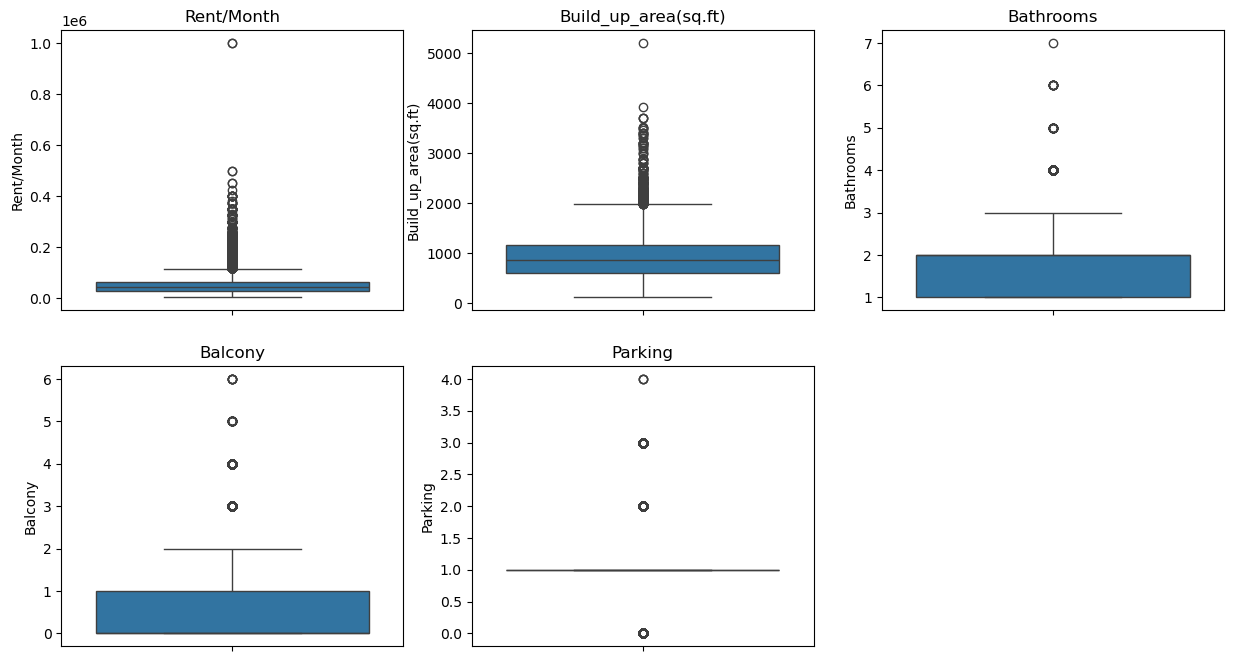

In [44]:
i=1
plt.figure(figsize=(15,8))
for x in df.columns:
    if df[x].dtypes != 'O':
        plt.subplot(2,3,i)
        plt.title(x)
        sns.boxplot(y=df[x])
        i+=1

In [45]:
# funnction to return index for column that have data points greater than given limit
def outs(df,col,limit):
    index = []
    index = df[df[col]>limit].index

    return index

ind = outs(df,'Rent/Month',500000)
ind

Index([4680, 13296], dtype='int64')

In [46]:
df[df['Rent/Month']>500000]

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
4680,Ghatkopar,1 RK Apartment,1000000,225,Semi Furnished,1,0,2.0
13296,Vidyavihar,1 RK Apartment,1000000,225,Semi Furnished,1,0,2.0


In [47]:
ind

Index([4680, 13296], dtype='int64')

In [48]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                 int64
Balcony                   int64
Parking                 float64
dtype: object

In [49]:
df[(df.Locality=='Bandra')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']==1500)&(df['Balcony']<4)]['Rent/Month'].sort_values(ascending=False).head(2)

1430    500000
1448    260000
Name: Rent/Month, dtype: int64

In [50]:
# Replacing value of outlier
df.loc[1430,'Rent/Month'] = 260000

In [51]:
df[(df.Locality=='Prabhadevi')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']==2200)&(df['Balcony']<4)]['Rent/Month'].sort_values(ascending=False).head(2)

12121    500000
12136    380000
Name: Rent/Month, dtype: int64

In [52]:
# Replacing value of outlier
df.loc[12121,'Rent/Month'] = 380000

In [53]:
value = df[(df.Locality=='Ghatkopar')&(df.Type=='1 RK Apartment')&(df['Build_up_area(sq.ft)']==225)]['Rent/Month'].median()
value

13000.0

In [54]:
# Replacing value of outlier
df.loc[4680,'Rent/Month'] = int(value)

In [55]:
value1 = df[(df.Locality=='Vidyavihar')&(df.Type=='1 RK Apartment')&(df['Build_up_area(sq.ft)']<300)]['Rent/Month'].median()
value1

14000.0

In [56]:
# Replacing value of outlier
df.loc[13296,'Rent/Month'] = int(value1)

In [57]:
df[(df.Locality=='Nariman Point')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']<=2880)&(df['Balcony']<5)]['Rent/Month'].sort_values(ascending=False).head(3)

10616    450000
10610    425000
10615    270000
Name: Rent/Month, dtype: int64

In [58]:
df.loc[[9163, 10610, 10616],'Rent/Month'] = 270000

In [59]:
df[df['Build_up_area(sq.ft)']>4000]

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
14721,Worli,3 BHK Apartment,300000,5200,Semi Furnished,4,4,2.0


In [60]:
value2 = df[df['Build_up_area(sq.ft)']>3500]['Build_up_area(sq.ft)'].median()
value2

3700.0

In [61]:
# Replacing value of outlier
df.loc[14721,'Build_up_area(sq.ft)'] = int(value2)

Total Apartment for rent of each Type

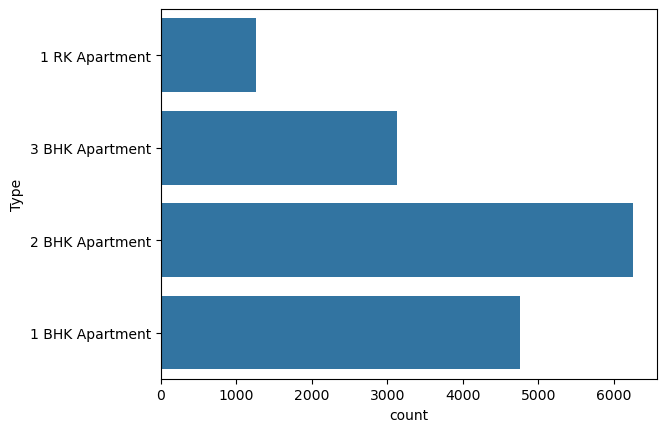

In [62]:
sns.countplot(y=df.Type)
plt.show()

Average Rent per month for each Type of Apartment

In [63]:
df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False)

Type
3 BHK Apartment    101556.444444
2 BHK Apartment     54774.726604
1 BHK Apartment     31502.143037
1 RK Apartment      18599.073927
Name: Rent/Month, dtype: float64

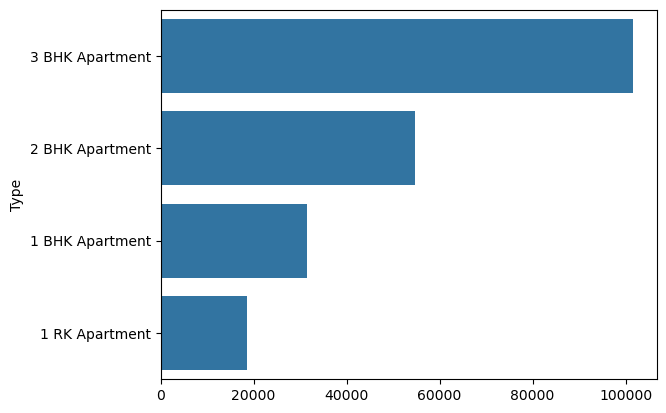

In [64]:
sns.barplot(y=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

Average Rent per month for every Locality

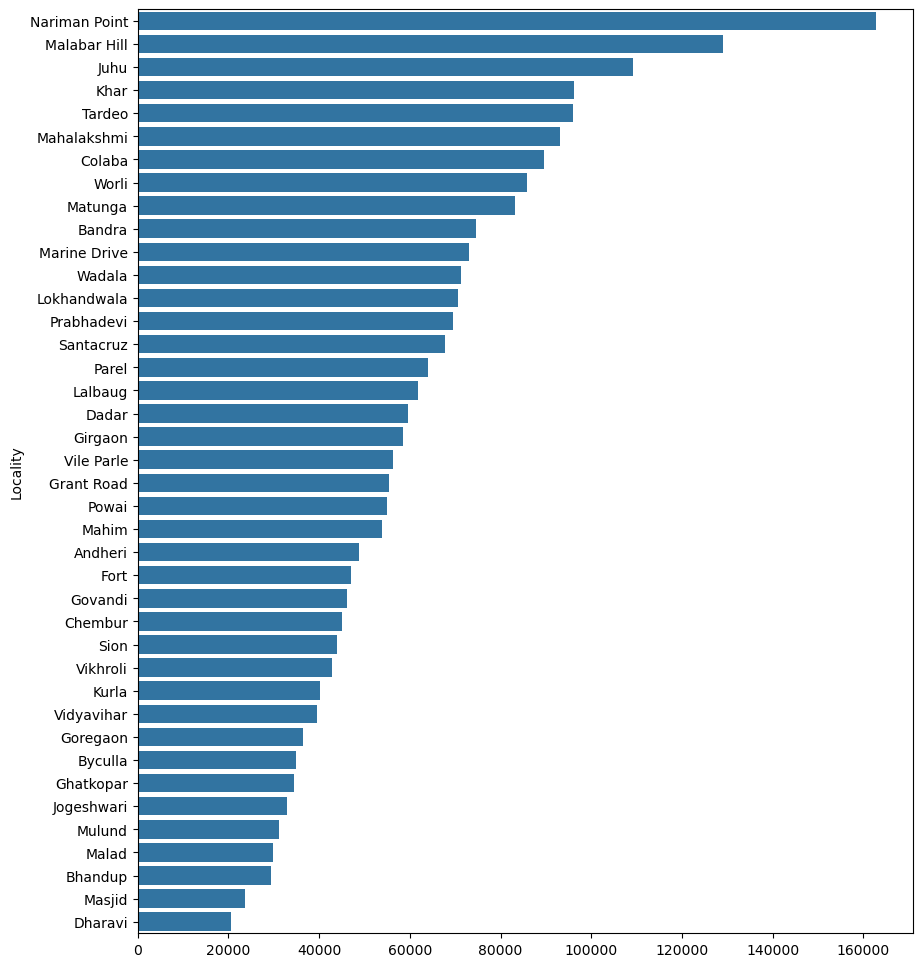

In [65]:
plt.figure(figsize=(10,12))
sns.barplot(y=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

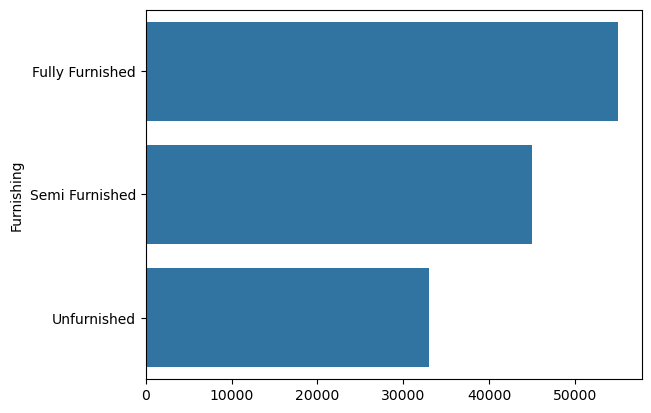

In [66]:
sns.barplot(y=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).index,x=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).values)
plt.show()

### Top High-priced Localities

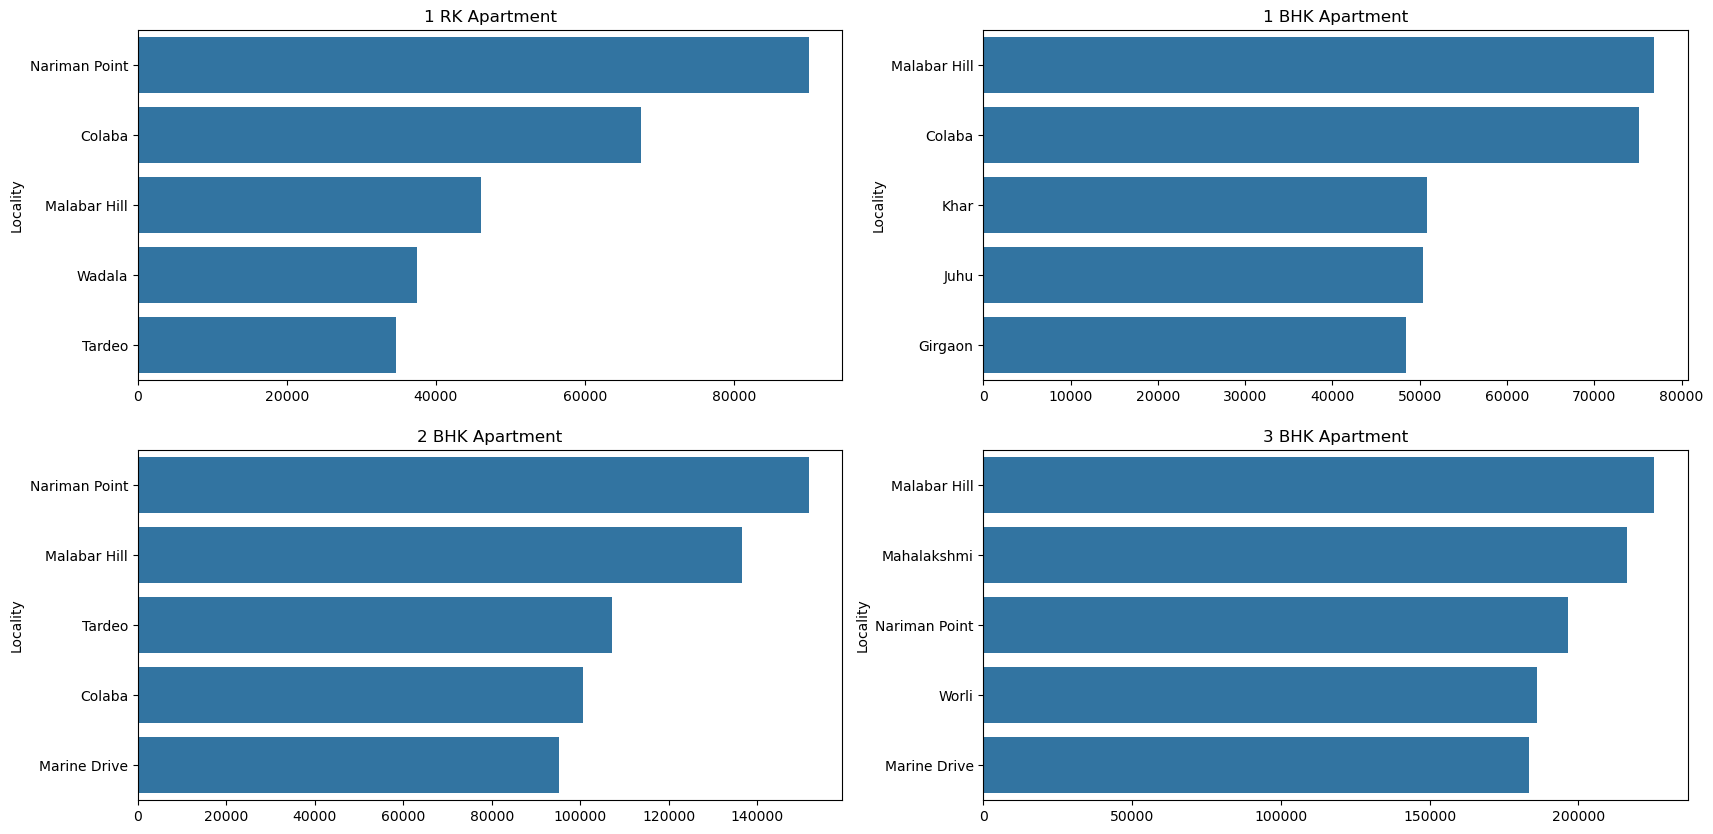

In [67]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('3 BHK Apartment')
plt.show()

### Top Low-priced Localities

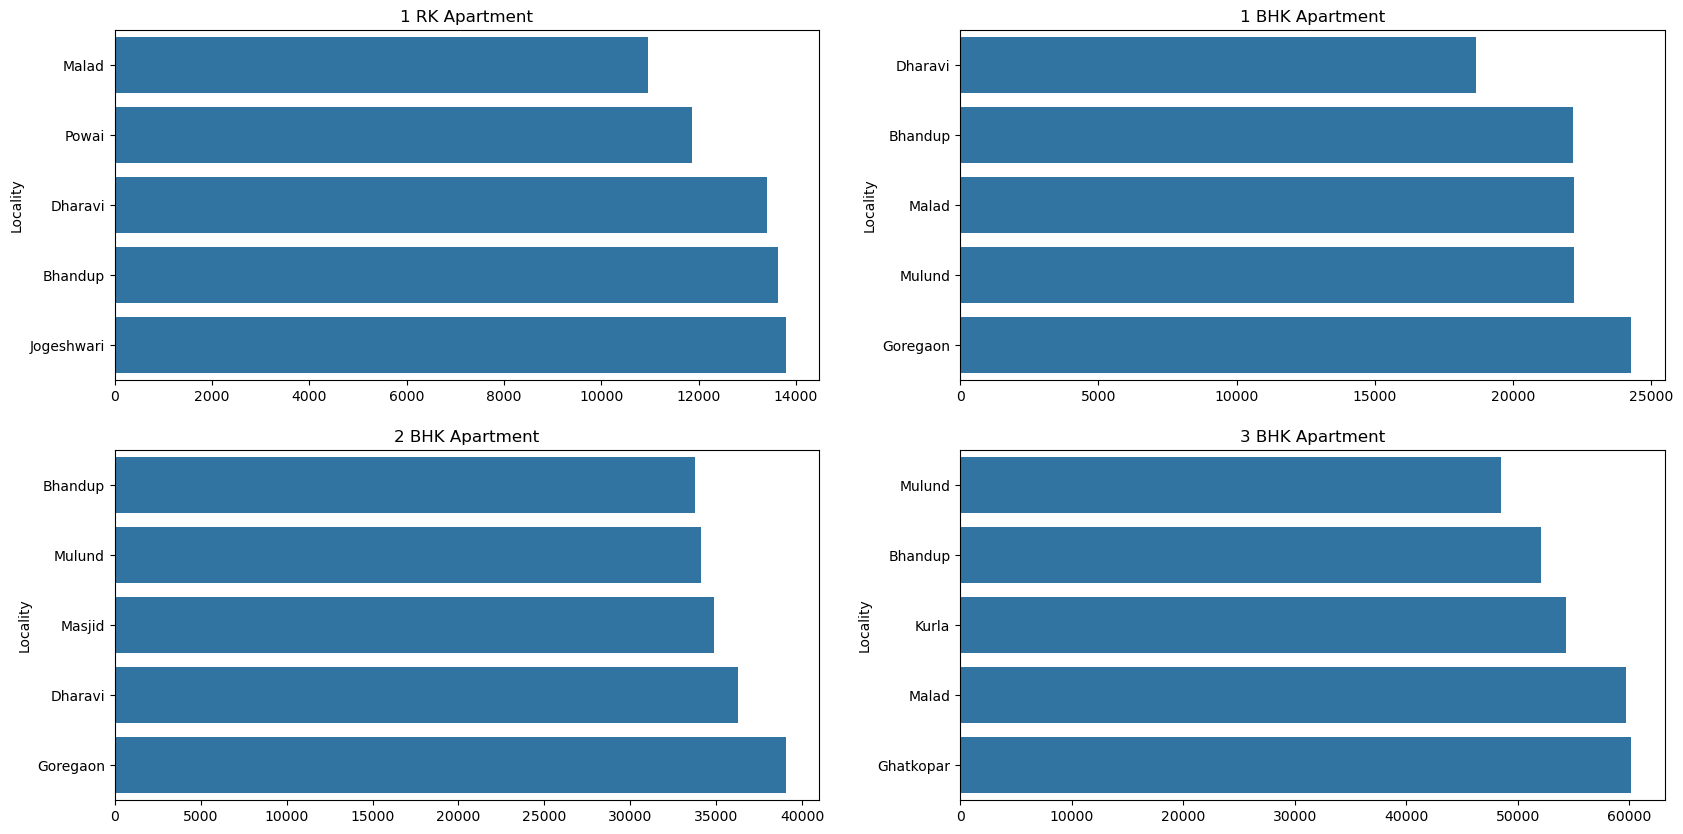

In [68]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('3 BHK Apartment')
plt.show()

### Rent as per balconies

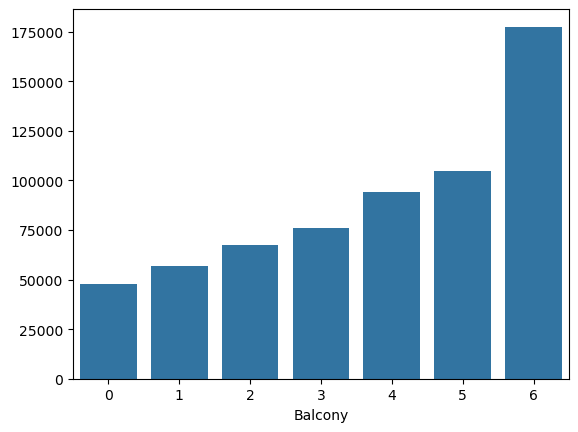

In [69]:
sns.barplot(x=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.show()

### Rent as per Parking

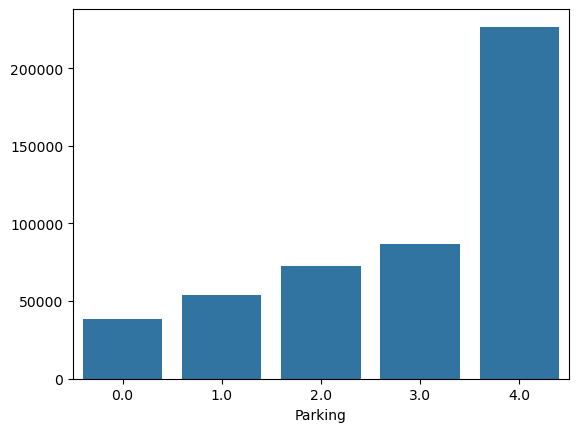

In [70]:
sns.barplot(x=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.show()

### Rent as per Area

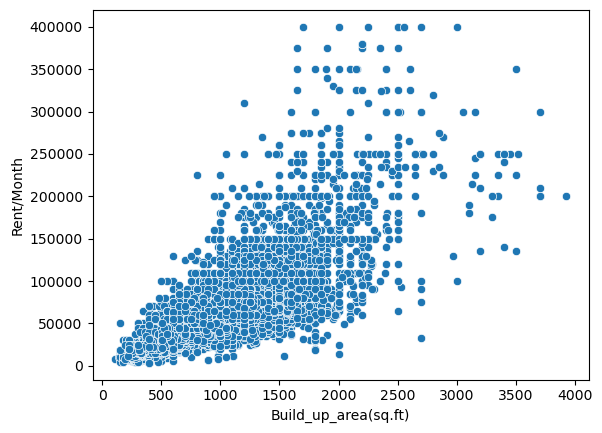

In [71]:
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'])
plt.show()

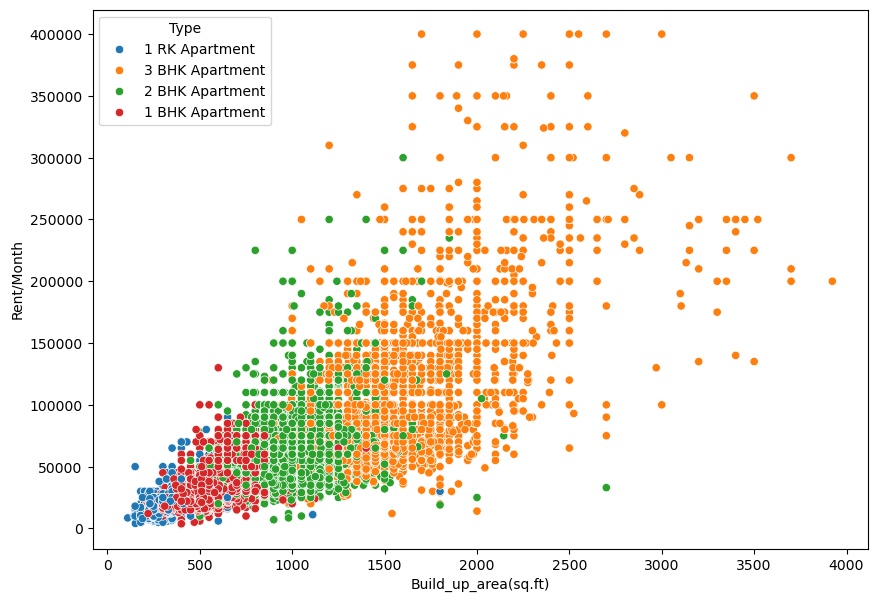

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'],hue=df.Type)
plt.show()

In [73]:
newdf = df.copy()

In [74]:
newdf

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,Andheri,1 RK Apartment,20000,350,Semi Furnished,1,0,0.0
1,Andheri,3 BHK Apartment,100000,1850,Semi Furnished,3,1,2.0
2,Andheri,2 BHK Apartment,45000,1240,Semi Furnished,2,4,1.0
3,Andheri,1 BHK Apartment,31500,650,Unfurnished,2,0,1.0
4,Andheri,2 BHK Apartment,44000,1250,Unfurnished,2,3,1.0
...,...,...,...,...,...,...,...,...
15381,Worli,1 RK Apartment,25000,300,Fully Furnished,1,0,0.0
15382,Worli,3 BHK Apartment,215000,3132,Semi Furnished,3,2,3.0
15383,Worli,2 BHK Apartment,100000,1180,Fully Furnished,2,3,1.0
15384,Worli,3 BHK Apartment,240000,3400,Semi Furnished,4,2,2.0


#### Label Encoding

In [75]:
df.Furnishing=df.Furnishing.map({'Unfurnished':0,'Semi Furnished':1,'Fully Furnished':2})

In [76]:
df.Type = df.Type.map({'1 RK Apartment':0,'1 BHK Apartment':1,'2 BHK Apartment':2,'3 BHK Apartment':3})

In [77]:
a = dict(zip(list(df.Locality.unique()),list(range(40))))

In [78]:
print(a)

{'Andheri': 0, 'Bandra': 1, 'Bhandup': 2, 'Byculla': 3, 'Chembur': 4, 'Colaba': 5, 'Dadar': 6, 'Dharavi': 7, 'Fort': 8, 'Ghatkopar': 9, 'Girgaon': 10, 'Goregaon': 11, 'Govandi': 12, 'Grant Road': 13, 'Jogeshwari': 14, 'Juhu': 15, 'Khar': 16, 'Kurla': 17, 'Lalbaug': 18, 'Lokhandwala': 19, 'Mahalakshmi': 20, 'Mahim': 21, 'Malabar Hill': 22, 'Malad': 23, 'Marine Drive': 24, 'Masjid': 25, 'Matunga': 26, 'Mulund': 27, 'Nariman Point': 28, 'Parel': 29, 'Powai': 30, 'Prabhadevi': 31, 'Santacruz': 32, 'Sion': 33, 'Tardeo': 34, 'Vidyavihar': 35, 'Vikhroli': 36, 'Vile Parle': 37, 'Wadala': 38, 'Worli': 39}


In [79]:
df.Locality=df.Locality.map(a)

In [80]:
df.Parking=df.Parking.astype('int')

In [81]:
df.dtypes

Locality                int64
Type                    int64
Rent/Month              int64
Build_up_area(sq.ft)    int64
Furnishing              int64
Bathrooms               int64
Balcony                 int64
Parking                 int64
dtype: object

### Model Building

In [82]:
X = df.copy()

In [83]:
X.drop('Rent/Month',axis=1,inplace=True)

In [84]:
X

,Locality,Type,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,0,0,350,1,1,0,0
1,0,3,1850,1,3,1,2
2,0,2,1240,1,2,4,1
3,0,1,650,0,2,0,1
4,0,2,1250,0,2,3,1
...,...,...,...,...,...,...,...
15381,39,0,300,2,1,0,0
15382,39,3,3132,1,3,2,3
15383,39,2,1180,2,2,3,1
15384,39,3,3400,1,4,2,2


In [85]:
Y = df['Rent/Month']

In [86]:
Y

0         20000
1        100000
2         45000
3         31500
4         44000
          ...  
15381     25000
15382    215000
15383    100000
15384    240000
15385    250000
Name: Rent/Month, Length: 15386, dtype: int64

### Split Data

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

#### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [89]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

lracc = r2_score(Y_test,Y_pred)
print('Score ->',lracc)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

Score -> 0.5616393151185262
RMSE -> 26908.335109217478


#### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

#fit the model on the data and predict the values
dt.fit(X_train,Y_train)

Y_pred=dt.predict(X_test)

In [91]:
dtacc = r2_score(Y_test,Y_pred)
print('Score ->',dtacc)

dtrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',dtrmse)

Score -> 0.5697452653734141
RMSE -> 26658.386383991583


#### Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=101,min_samples_split=15,min_samples_leaf=2,
                                        criterion='absolute_error')

#fit the model on the data and predict the values
rf.fit(X_train,Y_train)

Y_pred=rf.predict(X_test)

In [93]:
rfacc = r2_score(Y_test,Y_pred)
print('Score ->',rfacc)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

Score -> 0.737663550505886
RMSE -> 20816.14706296287


In [94]:
import pickle
pickle.dump(rf,open('FinalModel.pkl','wb'))
print('Done')

Done


## ✅ Conclusion

In this project, I successfully built a complete **House Rent Prediction System for Mumbai** using Machine Learning.

### 📌 Key Work Completed
- Performed **data cleaning and preprocessing** to ensure dataset quality
- Handled **outliers** to reduce the effect of extreme values on predictions
- Built and evaluated three regression models:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**

### 📊 Model Performance Summary (From Output Snips)
- **Linear Regression**
  - R² Score ≈ **0.56**
  - RMSE ≈ **26908**
- **Decision Tree Regressor**
  - R² Score ≈ **0.56**
  - RMSE ≈ **26956**
- **Random Forest Regressor**
  - R² Score ≈ **0.74**
  - RMSE ≈ **20638**

### 🏆 Best Model
Based on the evaluation metrics, **Random Forest Regressor performed the best**, achieving:
- Higher **R² Score**
- Lower **RMSE**

This indicates that Random Forest is able to capture complex patterns in the data more effectively than Linear Regression and Decision Tree.

### 🚀 Final Outcome
The final trained model can be used to predict house rent prices based on inputs like:
- Locality
- House Type
- Built-up Area
- Furnishing Status
- Bathrooms, Balcony, Parking, etc.

This project can be further improved by:
- Hyperparameter tuning (GridSearchCV / RandomizedSearchCV)
- Adding more features (e.g., floor number, age of property, distance from metro)
- Trying advanced models like XGBoost / LightGBM

## 🌐 Deployment (Streamlit Cloud)

To make this project more user-friendly, I deployed the final trained model as a **Streamlit Web App** on **Streamlit Community Cloud**.

The deployed app allows users to enter house details such as:
- Locality
- House Type (1RK / 1BHK / 2BHK / 3BHK)
- Built-up Area (sq.ft)
- Furnishing Status
- Bathrooms, Balcony, Parking

…and instantly get the **predicted monthly rent (₹)**.

✅ This deployment helps in real-time rent prediction through a simple and interactive UI.
